## **Task 6 - Dimensionality Reduction with PCA - Understanding Eigen Vectors.**

## **Importing Libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## **Loading Data.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mumbai1.csv to Mumbai1.csv


In [ ]:
house_data = pd.read_csv('Mumbai1.csv')

house_data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


## **Data Preprocessing.**

In [ ]:
house_data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [ ]:
house_data['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [ ]:
total_loc = len(house_data.Location.unique())
print("Total number of unique city location ", total_loc)

Total number of unique city location  413


In [ ]:
# Total counts of Bedrooms.

house_data['No. of Bedrooms'].value_counts()

No. of Bedrooms
2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: count, dtype: int64

In [ ]:
house_data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [ ]:
house_data.shape

(6347, 19)

In [ ]:
house_data=house_data.drop(['Unnamed: 0',"Children's Play Area",'Jogging Track','Intercom','Clubhouse','Gymnasium','Indoor Games','Swimming Pool'],axis=1)

In [ ]:
house_data.shape

(6347, 11)

In [ ]:
# Calculated price per square fit for houses by dividing actual price with area.

house_data['Price_per_sqft'] = house_data['Price']/house_data['Area']

In [ ]:
house_data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Landscaped Gardens', 'Gas Connection', 'Price_per_sqft'],
      dtype='object')

## **Data Visualization.**

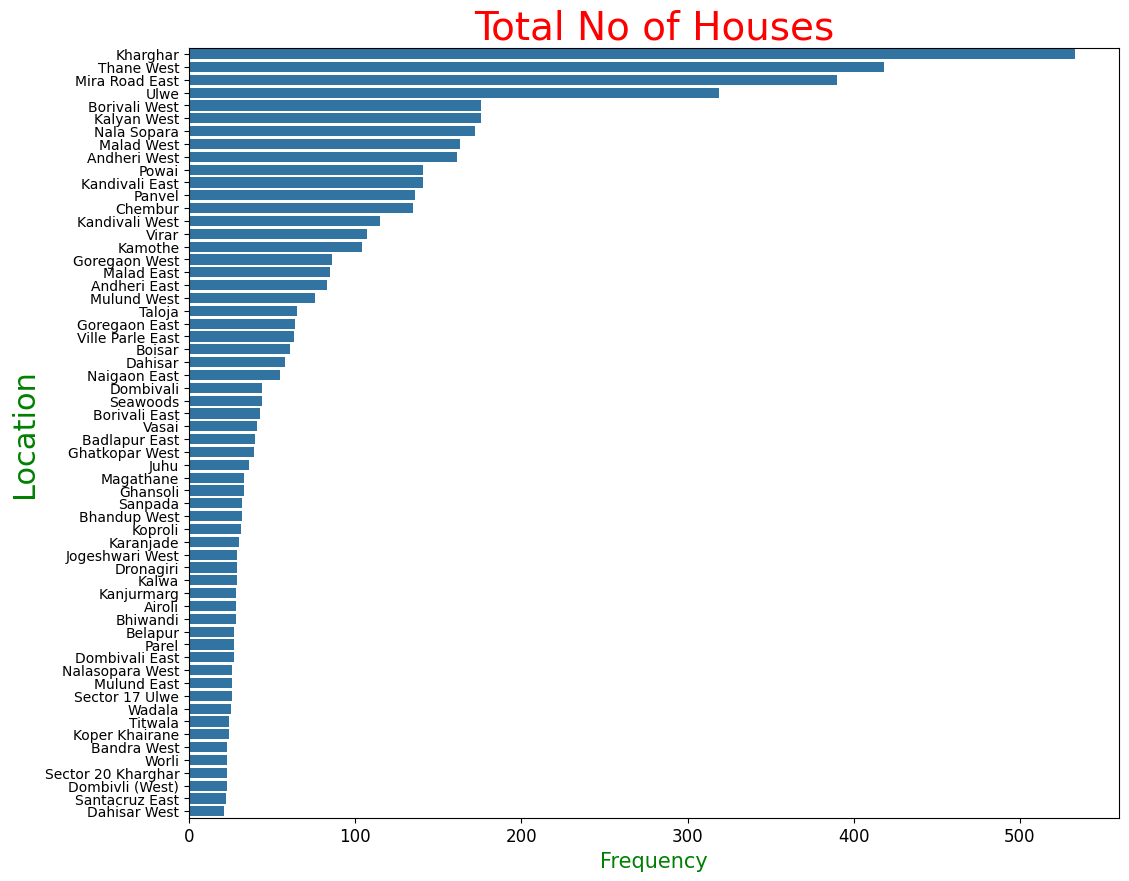

In [ ]:
plt.figure(figsize=(12,10))
most_cat = house_data['Location'].value_counts()[:60]
sns.barplot(x=most_cat, y=most_cat.index)
plt.xticks(size=12)
plt.xlabel("Frequency", size=15, c="g")
plt.ylabel("Location", size=22, c="g")
plt.title("Total No of Houses", size=28, c="r")
plt.show()

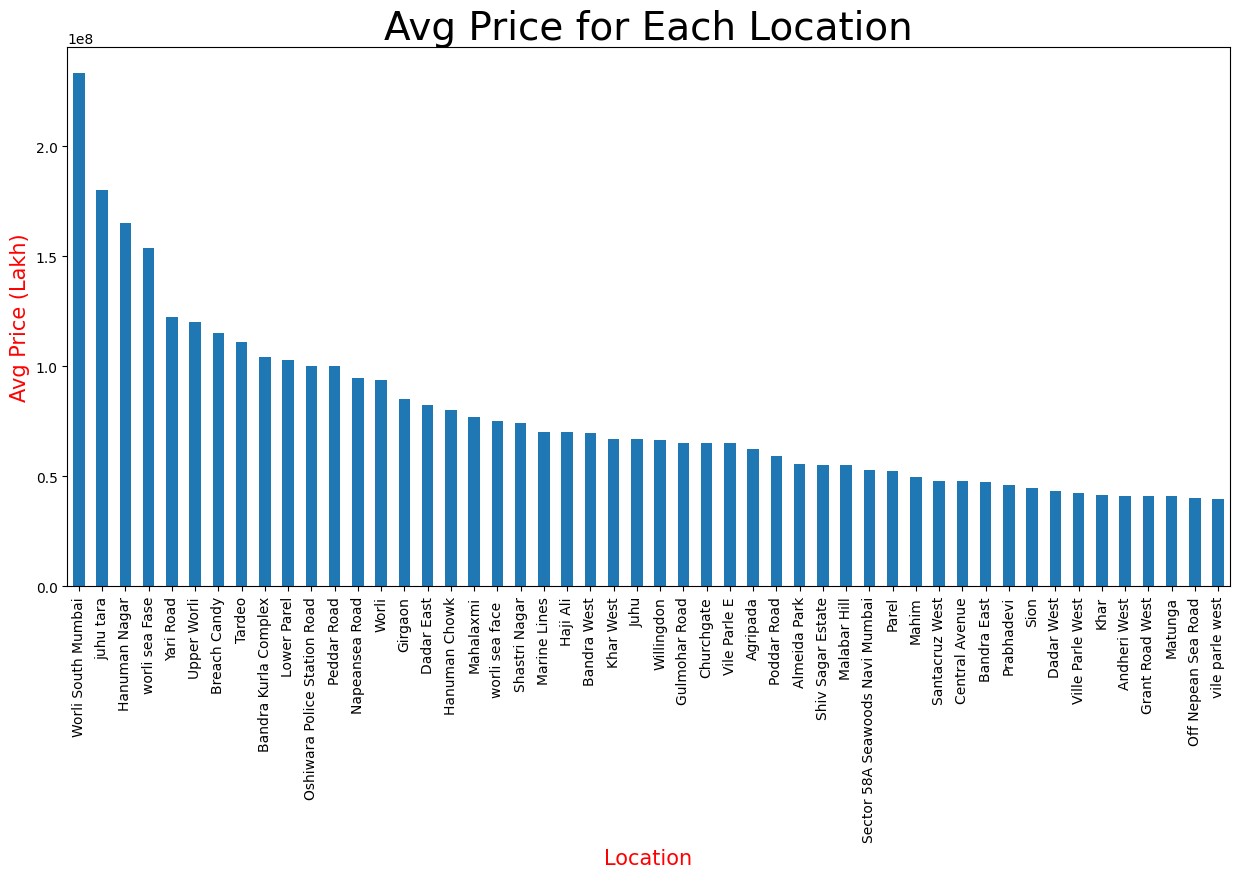

In [ ]:
plt.figure(figsize=(15,7))
house_data.groupby("Location")['Price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()

In [ ]:
# we have one catogarical column in the dataset, but we need to convert that in numerical form to feed it to our model because machine undesrtand only numerical values.

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['Location']= label_encoder.fit_transform(house_data['Location'])

In [ ]:
def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
house_data = removeOutliners(house_data)


In [ ]:
X = house_data.drop(columns=['Price'])

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Performing PCA.**

In [ ]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)

(4617, 9)


In [ ]:
original_features = house_data.columns


for feature in original_features:
    print(feature)

Price
Area
Location
No. of Bedrooms
New/Resale
Lift Available
Car Parking
Maintenance Staff
24x7 Security
Landscaped Gardens
Gas Connection
Price_per_sqft


In [ ]:
# Get the absolute sum of weights for each feature across selected principal components
feature_weights = np.abs(pca.components_)

# Get the indices of the top 9 features based on their weights
top_feature_indices = np.argsort(np.sum(feature_weights, axis=0))[::-1][:9]

# Get the names of the top 9 features
selected_features = house_data.columns[top_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
Landscaped Gardens
New/Resale
24x7 Security
Car Parking
No. of Bedrooms
Gas Connection
Area
Price
Location


In [ ]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
print("Eigenvectors:")  # Represent directions in the original feature space. Describe how the data is spread out or oriented in different directions.
print(eigenvectors)
print("\nEigenvalues:") # Represent the amount of variance explained by the corresponding eigenvectors.
print(eigenvalues)

Eigenvectors:
[[ 0.26792149 -0.00176914  0.25393705  0.02592431  0.25236359  0.51344801
   0.34813411  0.51313879  0.38212303 -0.02524373  0.06766516]
 [ 0.52164125 -0.13899013  0.54389806  0.12359847  0.04481484 -0.22213823
  -0.21278952 -0.22198529 -0.03675707  0.24290467  0.43727118]
 [ 0.18252297 -0.18344152  0.1683889  -0.51182963 -0.49320425  0.03759778
   0.38845474  0.01012112 -0.33770405 -0.35320741  0.09081373]
 [ 0.21536222  0.42087302  0.23113576  0.46636452 -0.27262688 -0.0321151
  -0.12702072 -0.03424625  0.06377696 -0.57118274 -0.28737486]
 [ 0.1264764   0.80588217  0.09779223 -0.3686996   0.16516088 -0.0170643
   0.12291554 -0.05947609 -0.20666471  0.30232383 -0.09343439]
 [-0.24149299  0.30677232 -0.16117267  0.26824303 -0.51186412  0.08773741
   0.14359989  0.09712836  0.11852435  0.18476769  0.63379511]
 [ 0.02483745 -0.11135756  0.0167801   0.54200874  0.08793458  0.05999957
   0.47353549  0.01452179 -0.61055343  0.23958227 -0.16423521]
 [-0.13258527  0.11586392 -0.

In [ ]:
pca.explained_variance_ratio_

array([0.24663547, 0.18554903, 0.11931449, 0.10466759, 0.08773472,
       0.06693222, 0.05802443, 0.05647311, 0.04235183])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9676828979125491

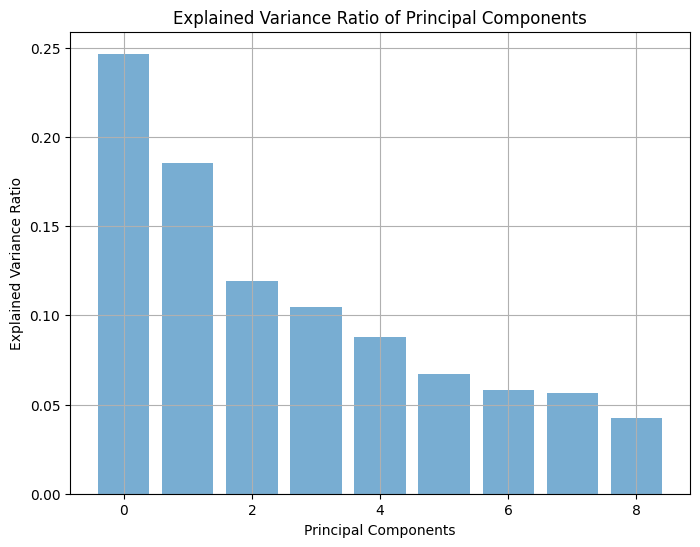

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(9), pca.explained_variance_ratio_, alpha=0.6)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid()
plt.show()

In [ ]:
import plotly.express as px

# Assuming 'Price' is the name of your target variable
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=house_data['Price'], opacity=0.5,
                 labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'},
                 title='Data Projected onto First Two Principal Components', color_continuous_scale='viridis')
fig.update_coloraxes(colorbar_title='Price')
fig.show()


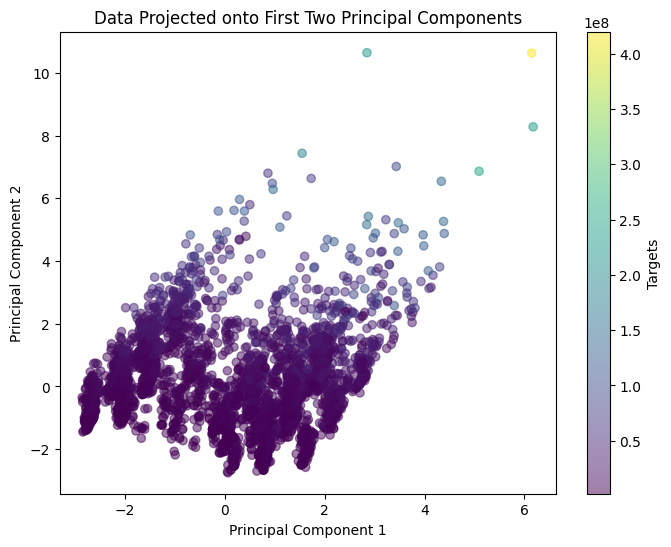

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=house_data['Price'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto First Two Principal Components')
plt.colorbar(label='Targets')
plt.show()


## **Building & Comparing Model on Original Data VS PCA's Data.**

## **Building Linear Regression Model on Original Data.**

In [ ]:
Y=house_data['Price']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
lr_clf.score(X_test,Y_test)

0.8552840862800298

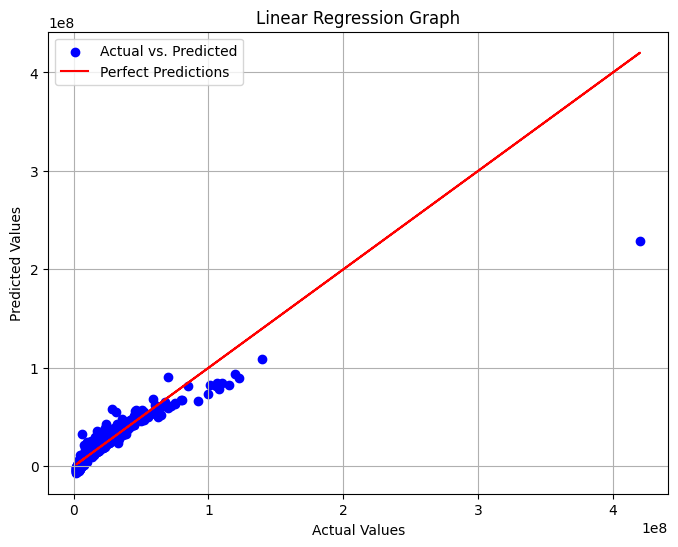

In [ ]:
# Plotting the linear regression graph with a straight line
plt.figure(figsize=(8, 6))

# Plot the actual values against the predicted values
plt.scatter(Y_test, LR_prediction, color='blue', label='Actual vs. Predicted')

# Plot a straight line representing perfect predictions (y_test = y_pred)
plt.plot(Y_test, Y_test, color='red', label='Perfect Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Graph')

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## **Building Linear Regression Model on PCA's Data.**

In [ ]:
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=10)

lr_clf_pca = LinearRegression()
lr_clf_pca.fit(X_train_pca, Y_train)

LR_prediction_pca = lr_clf_pca.predict(X_test_pca)

In [ ]:
# Getting the prediction score for X_test_pca
prediction_score_pca = lr_clf_pca.score(X_test_pca, Y_test)
print("Prediction score with PCA data:", prediction_score_pca)

Prediction score with PCA data: 0.7139517017359039


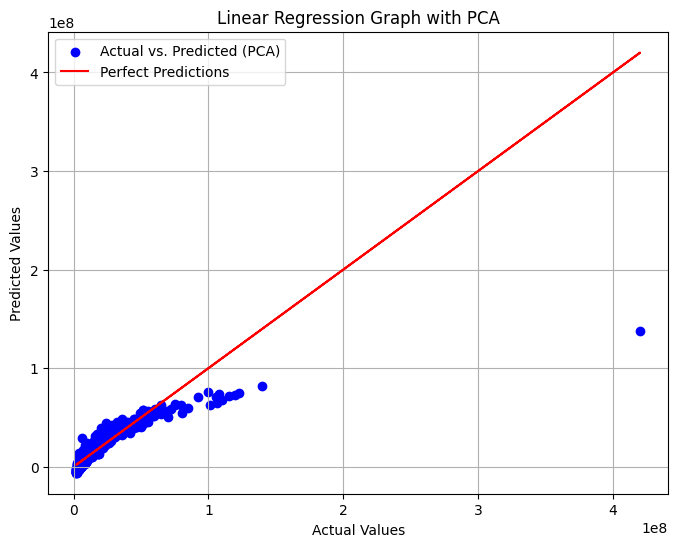

In [ ]:
# Plotting the linear regression graph with a straight line
plt.figure(figsize=(8, 6))

# Plotting the actual values against the predicted values
plt.scatter(Y_test, LR_prediction_pca, color='blue', label='Actual vs. Predicted (PCA)')

# Plotting a straight line representing perfect predictions (y_test = y_pred)
plt.plot(Y_test, Y_test, color='red', label='Perfect Predictions')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Graph with PCA')

plt.legend()

plt.grid(True)
plt.show()
